In [68]:
import os
import shutil
import random

In [69]:
import PIL
import skimage
import cv2

In [82]:
import seaborn as sns

In [122]:
pd.options.display.max_colwidth = 500

In [70]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [71]:
data_path = '../input/dataset/'
label_path = '../input/dataset_label/'

In [72]:
all_labels = pd.DataFrame([])
for l in os.listdir(label_path):
    all_labels = pd.concat([all_labels, pd.read_csv(label_path+l)], axis=0)

In [102]:
all_labels.head()

,file_name,title,author,category
0,044310073X.jpg,Oral and Maxillofacial Surgery: An Objective-B...,NaN,Medical Books
1,1438005687.jpg,"Barron's GRE, 21st Edition",Sharon Weiner Green M.A.,Test Preparation
2,0060750715.jpg,George Balanchine: The Ballet Maker (Eminent L...,Robert Gottlieb,Biographies & Memoirs
3,1580237959.jpg,"A Partner in Holiness: Deepening Mindfulness, ...",Rabbi Jonathan P. Slater DMin,Religion & Spirituality
4,0135137829.jpg,Construction Scheduling: Principles and Practi...,Jay S. Newitt,Arts & Photography


In [73]:
all_images = os.listdir(data_path)

In [74]:
def random_plot():
    fig = plt.figure(figsize=(18, 15))
    cols = 3
    rows = 3
    for i in range(1, cols*rows +1):
        
        random_img = all_images[np.random.randint(0,len(all_images))]
        
        # read image
        img = mpimg.imread(data_path+ random_img)
        # get random image label
        img_lbl = list(all_labels[all_labels.file_name==random_img].category)[0]
        
        # add details in subplot
        fig.add_subplot(rows, cols, i)
        plt.title(img_lbl)
        plt.imshow(img)
        
        plt.xticks([])
        plt.yticks([])
    plt.show()
    

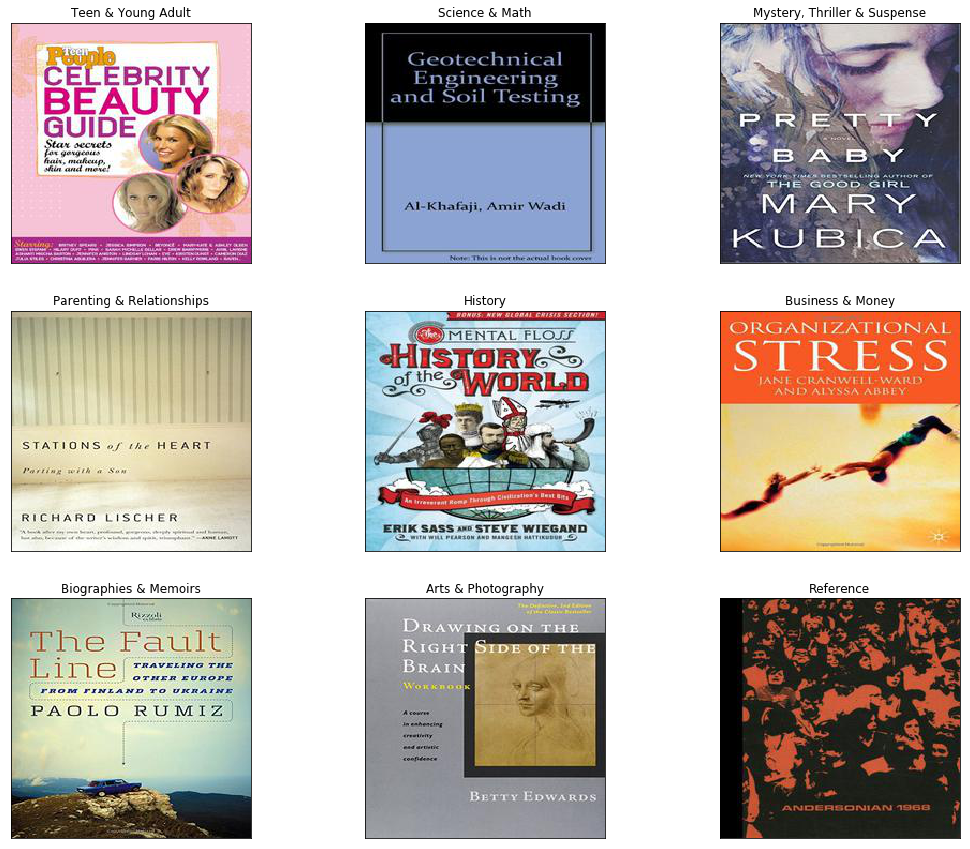

In [77]:
random_plot()

In [100]:
# no of missing author names
all_labels[all_labels.author.isna()].count()

file_name    3834
title        3834
author          0
category     3834
dtype: int64

In [106]:
# filling missing values
all_labels.author.fillna('', inplace=True)

In [111]:
all_label_nlp = all_labels.copy()

In [119]:
all_label_nlp['meta'] = all_label_nlp['title'] +' '+ all_label_nlp['author']
all_label_nlp.drop(['title', 'author'], inplace=True, axis=1)

In [123]:
all_label_nlp.meta.

0                                                                                                                                                                   Oral and Maxillofacial Surgery: An Objective-Based Textbook, 2e 
1                                                                                                                                                                                Barron's GRE, 21st Edition Sharon Weiner Green M.A.
2                                                                                                                                                                George Balanchine: The Ballet Maker (Eminent Lives) Robert Gottlieb
3        A Partner in Holiness: Deepening Mindfulness, Practicing Compassion and Enriching Our Lives Through the Wisdom of R. Levi Yitzhak of Berdichev's, Vol. 2  (Institute for Jewish Spirituality) Rabbi Jonathan P. Slater DMin
4                                                                                   